In [1]:
import pandas as pd
import os

### Merge the 12 month data

In [2]:
all_months_data = pd.DataFrame();

for file in os.listdir('./Sales_Data'):
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv')

### Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Add date time column

In [4]:
all_data[['Date', 'Time']] = all_data['Order Date'].str.split(' ', expand=True)

In [5]:
all_data.rename(columns={'Date':'Order Date', 'Time': 'Order Time'}, inplace=True)

In [6]:
all_data['Order Date'].head()

,Order Date,Order Date
0,04/19/19 08:46,04/19/19
1,NaN,NaN
2,04/07/19 22:30,04/07/19
3,04/12/19 14:38,04/12/19
4,04/12/19 14:38,04/12/19


### change column type

In [7]:
all_data = all_data.iloc[:, [0, 1, 2, 3, 4, 6, 7, 8]]

In [8]:
all_data.loc[all_data['Order Date'].isna()]
all_data[~all_data['Order Date'].str.split('/', expand=True).iloc[:, 0].duplicated()]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time
0,0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,439,176978,Apple Airpods Headphones,1,150,"589 Lake St, Portland, OR 97035",05/01/19,03:29
519,519,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
18383,0,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",08/31/19,22:21
20634,2251,238834,Apple Airpods Headphones,1,150,"761 Forest St, San Francisco, CA 94016",09/01/19,04:13
30394,0,295665,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",12/30/19,00:01
31957,1563,297150,Lightning Charging Cable,1,14.95,"427 Wilson St, Dallas, TX 75001",01/01/20,00:38
55511,0,150502,iPhone,1,700,"866 Spruce St, Portland, ME 04101",02/18/19,01:35
55543,32,150533,AAA Batteries (4-pack),1,2.99,"270 Dogwood St, San Francisco, CA 94016",03/01/19,03:06


In [9]:
all_data.dropna(subset=['Order ID'], axis=0, how='any', inplace=True)

In [10]:
filt = all_data['Order Date'].str.contains('Or')
all_data[filt]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time
519,519,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
...,...,...,...,...,...,...,...,...
185164,10000,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
185551,10387,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
186563,11399,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date
186632,11468,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order,Date


In [11]:
all_data = all_data[~filt]
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time
0,0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
5,5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27


In [12]:
all_data.index.duplicated()

array([False, False, False, ..., False, False, False])

In [13]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [14]:
all_data['Order Time'] = pd.to_datetime(all_data['Order Time'], format='%H:%M').dt.strftime('%I:%M:%p')

In [15]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time
0,0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:AM
2,2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,10:30:PM
3,3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM
4,4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM
5,5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:AM


### casting data types

In [16]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [18]:
all_data['Sales'].dtype

dtype('float64')

### what was the best month to sale

In [19]:
all_data['Month'] = all_data['Order Date'].dt.strftime('%m')
grp_month = all_data.groupby('Month')

In [20]:
results = grp_month.sum()
results['Sales']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

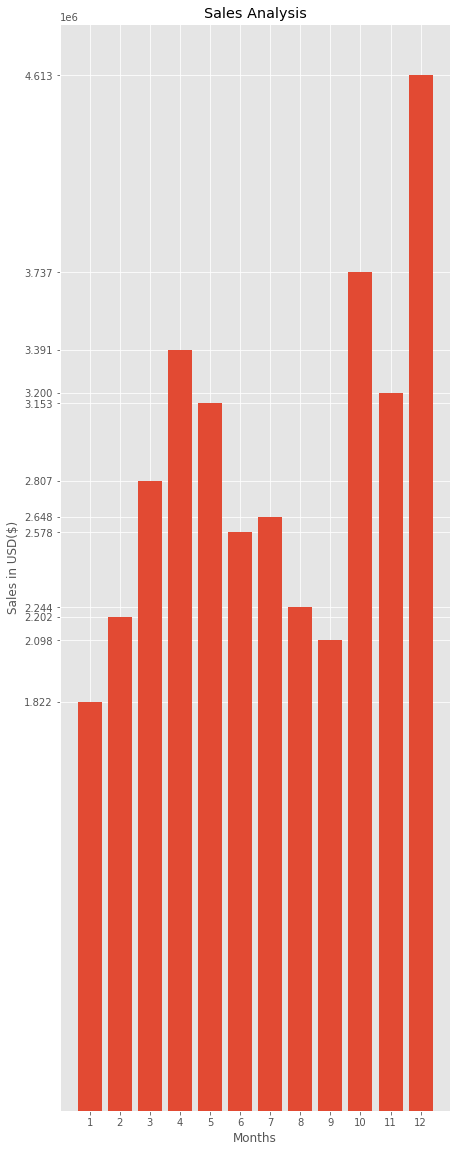

In [21]:
from matplotlib import pyplot as plt

months = range(1, 13)
plt.clf()
plt.style.use('ggplot')

plt.title('Sales Analysis')
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.xticks(months)
plt.yticks(results['Sales'])

plt.gcf().set_size_inches(7, 20)
plt.bar(months, results['Sales'])
plt.show()

In [22]:
all_data.drop(all_data.columns[0], axis=1, inplace=True)

### Add city column

In [23]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:AM,23.90,04,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,10:30:PM,99.99,04,Boston
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,600.00,04,Los Angeles
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,11.99,04,Los Angeles
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:AM,11.99,04,Los Angeles


In [24]:
all_data.drop('City', axis=1, inplace=True)

In [25]:
def getCity(x):
    return x.split(',')[1]
def getState(x):
    return x.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f'{getCity(x)} ({getState(x)})')

In [26]:
get_city = all_data.groupby('City')
results = get_city.sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


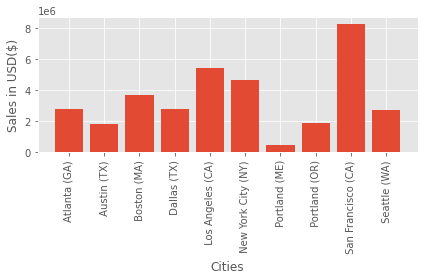

In [27]:
plt.clf()
plt.xlabel('Cities')
plt.ylabel('Sales in USD($)')
plt.xticks(rotation='vertical', size=10)
plt.bar(results.index, results['Sales'])
plt.tight_layout()
plt.show()

### What time should we display advertisement to maximize likelihood of customer's buying product?

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:AM,23.90,04,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,10:30:PM,99.99,04,Boston (MA)
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,600.00,04,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,11.99,04,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:AM,11.99,04,Los Angeles (CA)


In [29]:
all_data.drop('Month', axis=1, inplace=True)

In [30]:
orderTime = pd.to_datetime(all_data['Order Time'], format='%I:%M:%p')
hour = orderTime.dt.strftime('%I')
minute = orderTime.dt.strftime('%M')
get_hour = all_data.groupby(hour)

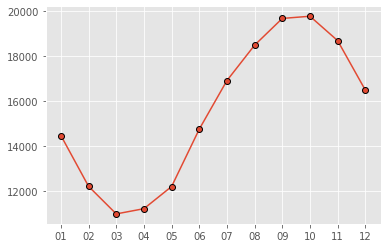

In [31]:
plt.clf()
plt.plot(get_hour.count().index, get_hour.count()['City'], marker='o', mec='k')
plt.grid(True)
plt.show()

### what product are sold together 

In [32]:
st = all_data[all_data['Order ID'].duplicated(keep=False)]
st

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Sales,City
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,11.99,Los Angeles (CA)
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",2019-04-03,07:42:PM,600.00,Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",2019-04-03,07:42:PM,11.95,Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",2019-04-07,11:31:AM,99.99,Boston (MA)
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,"106 7th St, Atlanta, GA 30301",2019-09-20,08:18:PM,3.84,Atlanta (GA)
186803,259314,Wired Headphones,1,11.99,"241 Highland St, Atlanta, GA 30301",2019-09-16,12:25:AM,11.99,Atlanta (GA)
186804,259314,AAA Batteries (4-pack),2,2.99,"241 Highland St, Atlanta, GA 30301",2019-09-16,12:25:AM,5.98,Atlanta (GA)
186841,259350,Google Phone,1,600.00,"519 Maple St, San Francisco, CA 94016",2019-09-30,01:49:PM,600.00,San Francisco (CA)


In [33]:
st['Grouped'] = st.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
st.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9004\794843068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Grouped'] = st.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Sales,City,Grouped
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,11.99,Los Angeles (CA),"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",2019-04-03,07:42:PM,600.00,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",2019-04-03,07:42:PM,11.95,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",2019-04-07,11:31:AM,99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [34]:
st = st[['Order ID', 'Grouped']].drop_duplicates()
st.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [37]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in st['Grouped']:
    row_list =  row.split(',')
    count.update(combinations(row_list, 2))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### what product sold the most

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date,Order Time,Sales,City
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46:AM,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,10:30:PM,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,02:38:PM,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27:AM,11.99,Los Angeles (CA)


In [40]:
get_product = all_data.groupby('Product')
quantity_ordered = get_product.sum()['Quantity Ordered']

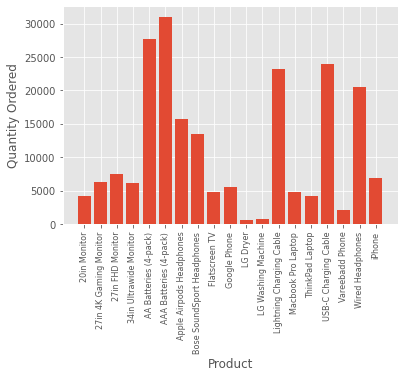

In [48]:
products = [product for product, df in get_product]

plt.clf()
plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9004\246295607.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


<Figure size 432x288 with 0 Axes>

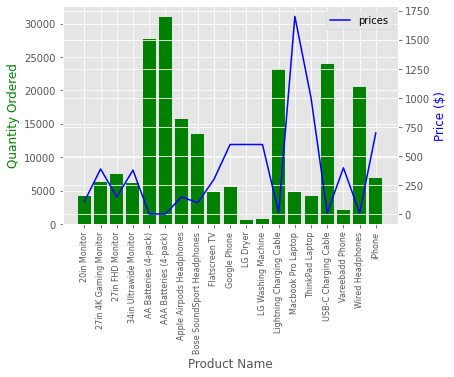

In [65]:
prices = all_data.groupby('Product').mean()['Price Each']

plt.clf()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.legend(['prices'])
plt.show()